In [1]:
import subprocess
import pandas as pd
from matplotlib import pyplot as plt
import math

/home/k/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [46]:
def dist_del(df_row):
    try:
        a=df_row['x_diff']
        b=df_row['y_diff']
        return(math.sqrt(a**2 + b**2))
    except:
        return(None)

In [ ]:
#Run Lidar SDK for 5 seconds and save data to an output file

command='timeout 5 rplidar_ultra_simple --channel --serial /dev/ttyUSB1 460800 >scan_result'
subprocess.run(command,shell=True)

In [100]:
file=open("/home/k/ROS/rplidar_sdk-master/output/Linux/Release/scan_result","r")

list_data=[]
arr=[]
for line in file.readlines():
    if(line[0] == ' '):
        line=line.strip()
        arr=line.split(' ')
        if(len(arr)==6):
            d={}
            d[arr[0]]=arr[1]
            d[arr[2]]=arr[3]
            d[arr[4]]=arr[5]
            list_data.append(d)
file.close()

x=pd.DataFrame(list_data)
x['theta:']=x['theta:'].astype(float)
x['Dist:'] = x['Dist:'].astype(float)
x['Q:']=x['Q:'].astype(int)

l=[]
for i in x.iterrows():
    d={}
    theta=i[1]['theta:']
    dist=i[1]['Dist:']
    d['xcoord']=math.cos(math.radians(theta))*dist
    d['ycoord']=math.sin(math.radians(theta))*dist
    l.append(d)

y=pd.DataFrame(l)

final=pd.concat([x,y],axis=1)

final = final[final['Q:']>0]

final['x_diff']=final['xcoord'].diff()
final['y_diff']=final['ycoord'].diff()
final['delta_dist']=final.apply(dist_del,axis=1)
a=[a/10.0 for a in range(0,11)]
cut_off=final['delta_dist'].quantile(0.8)
final_filt=final[final.delta_dist <= cut_off]


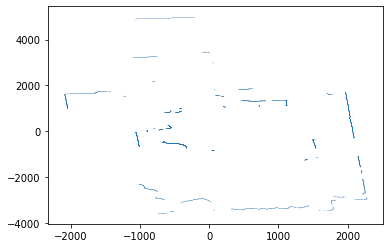

In [106]:
plot=plt.scatter(final['xcoord'],final['ycoord'],s=.0001,marker='.')


In [88]:
final_filt.ycoord.max()-final_filt.ycoord.min()

286.82223102299815

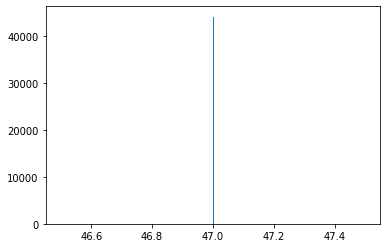

In [97]:
h=plt.hist(final_filt['Q:'],bins=300)

0.0       0.000000
0.1      10.550858
0.2      13.874174
0.3      17.342072
0.4      20.849705
0.5      25.700480
0.6      29.241273
0.7      35.318733
0.8      72.494966
0.9    1503.000000
1.0    4488.000000
Name: delta_dist, dtype: float64

In [45]:
len(final[final['delta_dist']< 100])

10113